# Neural Networks in PyTorch

## Lab policy

- This lab is a mandatory part of the "Reinforcement Learning" course.
The solution is graded from 0 to 10.
The average of the Python labs counts for 50% of the final grade.

- This lab is to be solved **individually**.

- The solution consists of a copy of this notebook, containing your implementations and algorithm analysis.
It will be sent by email to florin.gogianu@gmail.com.

- The deadline for submitting the solution is **December 17, 2024, by 23:59**.
Late submission is accepted, but the maximum grade is reduced by half: 5 points.
The time required to complete the lab depends on experience with Python programming, but part of the work will need to be done at home.
It is strongly recommended that you do not wait until right before the deadline to finish the solution.

- Discussion of ideas between groups is encouraged, but reusing code or reports (even partially) is not allowed. **Violation of this rule (copying) will result in immediate loss of the right to take the exam**.

- A discussion session will be organized where the contribution of each student will be determined through detailed technical questions, including questions related to Python implementation.

## Part I: Basic tensor operations
---

![Source: DataCamp](https://i.imgur.com/1Ai1wAB.jpg)
*Image source: [DataCamp](https://www.datacamp.com/)*

### Initializing tensors

PyTorch supports tensors and provides a lot of useful tensor operations. Let's play with some of them. When in doubt, look up function definitions and examples of use in the official PyTorch documentation https://pytorch.org/docs/stable/tensors.html

In [ ]:
import torch
import numpy

### Create tensor from existing data
Let's create our first tensor from a list.

In [ ]:
x = torch.tensor([1, 2, 3.0])
print(x)

tensor([1., 2., 3.])


### Hardware acceleration

PyTorch can use various hardware accelerators such as GPUs, TPUs (Tensor Processing Unit, google it :) ), ARM co-processors for efficient matrix operations.

For taking advantage of accelerators we first need to load the tensor into the memory of the device.

Where is our Tensor located? To find out whether the tensor is loaded into RAM or resides on the GPU, inspect the ```.device``` attribute.

In [ ]:
print(x.device)

cpu


To move Tensor to either CPU/GPU, call function ```.to()``` on the Tensor object with the argument ```device='cpu'``` or ```device='cuda'```.

In [ ]:
x = x.to('cuda')
print(x.device)

cuda:0


Let's move the Tensor back to the CPU.

In [ ]:
x = x.to('cpu')
print(x.device)

cpu


### Shapes

What is the size of our Tensor? To find out, call ```.size()``` or the attribute ```.shape``` on the Tensor object.

In [ ]:
print(x.size())
print(x.shape)

torch.Size([3])
torch.Size([3])


Let's now create 2 other Tensors of different shapes.

In [ ]:
y = torch.tensor([[1, 2, 3],
                  [4, 5, 6.0]])
z = torch.tensor([[[3, 7], [6, 1]],
                  [[0, 9], [2, 5]]])
print(y)
print(z)

tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor([[[3, 7],
         [6, 1]],

        [[0, 9],
         [2, 5]]])


What are the shapes and types of ```y``` and ```z```?

In [ ]:
print('y shape: ', y.size())
print('z shape: ', z.size())
print('y type: ', y.dtype)
print('z type: ', z.dtype)

print(y.nelement())

y shape:  torch.Size([2, 3])
z shape:  torch.Size([2, 2, 2])
y type:  torch.float32
z type:  torch.int64
6


### Create tensor using predefined operations

Let's create a Tensor and populate it with random numbers. We can call the [```torch.rand()```](https://pytorch.org/docs/stable/generated/torch.rand.html#torch.rand) function, which populates the Tensor with numbers from U(0, 1). The function requires the dimensions of the Tensor as arguments.

In [ ]:
x = torch.rand(2, 3)
print(x)

tensor([[0.2781, 0.4460, 0.2026],
        [0.9435, 0.6094, 0.2496]])


To create a Tensor filled with 1s, use the function ```torch.ones()```.

In [ ]:
x = torch.ones(3, 3)  # Creates a 3x3 2D Tensor initialized with 1s
print(f'2D Tensor: \n{x}')
print(f'type: {x.dtype}')

2D Tensor: 
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
type: torch.float32


To create a Tensor filled with zeros, use the function ```torch.zeros()```.

In [ ]:
x = torch.zeros(3, 3, 3)  # Creates a 3x3x3 3D Tensor initialized with 0s
print(f'3D Tensor: \n{x}')
print(f'type: {x.dtype}')

3D Tensor: 
tensor([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]])
type: torch.float32


#### Task 1a [0.5pt]:

Create a 2D Tensor of size 100x100 representing an identity matrix. Use a predefined ```PyTorch``` operation (hint: look up function in the documentation - section Creation Ops [link to documentation](https://pytorch.org/docs/stable/torch.html#tensor-creation-ops))

In [ ]:
x = torch.eye(100,100)

print(x)
print(x.size())

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])
torch.Size([100, 100])


You can create an interval \[```start_index```, ```stop_index```) using the [```torch.arange()```](https://pytorch.org/docs/stable/generated/torch.arange.html#torch.arange) function.

In [ ]:
x = torch.arange(start=0, end=10)
print(x)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


If you want steps > 1, use the ```step``` argument

In [ ]:
x = torch.arange(start=10, end=20, step=2)
print(x)

tensor([10, 12, 14, 16, 18])


### Numerical precision and casting

In [ ]:
x = torch.ones(2, 3)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


What is the type of our Tensor? We can find out by inspecting the ```.dtype``` attribute of the Tensor object. All Tensor types are listed in the documentation: https://pytorch.org/docs/stable/tensor_attributes.html#torch.torch.dtype

In [ ]:
print(x.dtype)

torch.float32


More about the types supported by PyTorch: https://pytorch.org/docs/stable/tensors.html

To convert a Float Tensor let's say to Long, use the [```.long()```](https://pytorch.org/docs/stable/generated/torch.Tensor.long.html?highlight=long) function.

In [ ]:
y = x.long()
print(y)
print(y.dtype)

tensor([[1, 1, 1],
        [1, 1, 1]])
torch.int64


Another option is to call the [```.to()```](https://pytorch.org/docs/stable/generated/torch.Tensor.to.html#torch.Tensor.to) function (which we used to move Tensors to GPU and back to CPU) and specify the ```dtype``` argument.

In [ ]:
z = x.to(dtype=torch.int32)
print(z)
print(z.dtype)

tensor([[1, 1, 1],
        [1, 1, 1]], dtype=torch.int32)
torch.int32


Sometimes our datasets are saved as [NumPy](https://numpy.org/doc/stable/reference/index.html#reference) arrays. To convert them to Tensors, call the [```torch.from_numpy```](https://pytorch.org/docs/stable/generated/torch.from_numpy.html#torch.from_numpy) (or [```torch.astensor()```](https://pytorch.org/docs/stable/generated/torch.as_tensor.html?highlight=as_tensor#torch.as_tensor)) function.

In [ ]:
x_np = numpy.array([1, 2, 3])
x = torch.from_numpy(x_np)
print(x)
print(x.dtype)


tensor([1, 2, 3])
torch.int64


**Careful:** The returned tensor will share the same memory as the original tensor.

In [ ]:
x[0] = -10
print("x = ", x)
print("x_np = ", x_np)

x =  tensor([-10,   2,   3])
x_np =  [-10   2   3]


To return a Tensor without sharing memory with the old one, call [```torch.tensor```](https://pytorch.org/docs/stable/generated/torch.tensor.html#torch.tensor):

In [ ]:
x_np = numpy.array([1, 2, 3])
x = torch.tensor(x_np)
print(x)
print(x.dtype)
x[0] = -10
print("x = ", x)
print("x_np = ", x_np)

tensor([1, 2, 3])
torch.int64
x =  tensor([-10,   2,   3])
x_np =  [1 2 3]


### Basic arithmetic
Let's do some basic matrix operations with PyTorch.


In [ ]:
# Create a 3x4 random PyTorch Tensor and a 3x4 one filled with ones.
rand_tens = torch.randn(3, 4)
ones_tens = torch.ones(3, 4)
print(f'Random PyTorch Tensor:\n{rand_tens}')
print(f'Ones PyTorch Tensor:\n{ones_tens}')

Random PyTorch Tensor:
tensor([[ 0.7323, -1.6370, -0.0173,  0.1488],
        [ 0.6990, -0.8442,  1.1800,  1.4478],
        [ 0.1455, -0.1618,  0.3283, -0.9390]])
Ones PyTorch Tensor:
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


You can perform addition:

In [ ]:
print(f'Their sum:\n{ones_tens + rand_tens}')

Their sum:
tensor([[ 1.7323, -0.6370,  0.9827,  1.1488],
        [ 1.6990,  0.1558,  2.1800,  2.4478],
        [ 1.1455,  0.8382,  1.3283,  0.0610]])


And subtraction:

In [ ]:
print(f'Their difference:\n{ones_tens - rand_tens}')

Their difference:
tensor([[ 0.2677,  2.6370,  1.0173,  0.8512],
        [ 0.3010,  1.8442, -0.1800, -0.4478],
        [ 0.8545,  1.1618,  0.6717,  1.9390]])


Matrix addition is not defined if the shapes are not the same. What do you think happens if you add a number to a Tensor?

In [ ]:
resulting = ones_tens + 1
print(resulting)

tensor([[2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]])


Notice how *1* is added to every element in the Tensor.

This convenient operation is called *broadcasting* and it's a way of '**stretching/copying**' some Tensor dimensions - we're gonna come back to this concept a bit later.

Let's now multiply two matrices using `torch.mm()`:


In [ ]:
print(f'Their product:\n{torch.mm(ones_tens, rand_tens)}')

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x4 and 3x4)

Whoops. Recall from Linear Algebra that matrix dimensions must agree. If A is an `m×n` matrix and B is an `n×p` matrix, the product will be an `m×p` matrix. Let's use `torch.transpose()` to swap the dimensions of `rand_tens`:

In [ ]:
print(f'Their product:\n{torch.mm(ones_tens, torch.transpose(rand_tens, 0, 1))}')

Their product:
tensor([[-0.7732,  2.4826, -0.6271],
        [-0.7732,  2.4826, -0.6271],
        [-0.7732,  2.4826, -0.6271]])


#### Task 1b [0.5pt]:

Compute $X = ABC$, where $A$, $B$ and $C$ are three matrices defined below:

In [ ]:
A = torch.rand(3, 10)
B = torch.rand(10, 30)
C = torch.rand(30, 5)

X = torch.mm(torch.mm(A,B),C)
print(X)
X=A @ B @ C
print(X)

tensor([[37.6279, 44.5850, 34.3364, 39.1095, 39.7155],
        [21.3523, 24.6764, 19.3422, 22.5053, 21.7693],
        [38.3779, 45.1808, 35.2317, 40.2853, 40.3029]])
tensor([[37.6279, 44.5850, 34.3364, 39.1095, 39.7155],
        [21.3523, 24.6764, 19.3422, 22.5053, 21.7693],
        [38.3779, 45.1808, 35.2317, 40.2853, 40.3029]])


Do not confuse ```torch.mm``` with ```*``` operator, which computes elementwise multiplication (if Tensor dimensions agreee):

In [ ]:
x = torch.arange(0, 10)
y = torch.arange(10, 20)
print('x = ', x)
print('y = ', y)
print('elementwise multiplication: ', x*y)

x =  tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y =  tensor([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])
elementwise multiplication:  tensor([  0,  11,  24,  39,  56,  75,  96, 119, 144, 171])


Let's compute the sum of all the elements in a Tensor using ```torch.sum()```.

In [ ]:
x = torch.ones(2, 5)
print(x)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


In [ ]:
print('sum of elements in x = ', torch.sum(x))

sum of elements in x =  tensor(10.)


What if we want to compute the sum of each column of a 2D Tensor? We can specify the ```dim``` argument:

In [ ]:
# dim refers to the axis/dimension over which the operation is performed (i.e. over rows - dimension 0)
torch.sum(x, dim=0)

tensor([2., 2., 2., 2., 2.])

What happens when we specify ```dim=1```?

In [ ]:
torch.sum(x, dim=1)

tensor([5., 5.])

The sum is of each row is computed, by aggregating the elements over the columns (dimension 1). You can think of `dim` as the dimension which is reduced/collapses as a result of the operation.  

In [ ]:
# tensor containing 100 images
images = torch.randn(100, 3, 32, 32)

# TODO: compute pixelwise mean over the 3 channels
ch_mean = torch.mean(images, dim=1)

print(ch_mean.size())

torch.Size([100, 32, 32])


We can compute the vector norm of a 1D Tensor of length n using [```torch.linalg.norm()```](https://pytorch.org/docs/stable/generated/torch.linalg.norm.html#torch.linalg.norm):
$$\|\textbf{x}\| = \sqrt{x_1^{2}+x_2^{2}+...+x_n^{2}}$$

In [ ]:
x = torch.rand(10)
x_norm = torch.linalg.norm(x)
print(x)
print("norm = ", x_norm)

tensor([0.0681, 0.7419, 0.5960, 0.6021, 0.3386, 0.5912, 0.8001, 0.6276, 0.3529,
        0.4485])
norm =  tensor(1.7597)


#### Task 1c [0.5pt]:

Compute the vector norm using [```torch.sum()```](https://pytorch.org/docs/stable/generated/torch.sum.html?highlight=sum#torch.sum) and [```torch.sqrt()```](https://pytorch.org/docs/stable/generated/torch.sqrt.html?highlight=sqrt#torch.sqrt)

In [ ]:
x_norm_2 = torch.sqrt(torch.sum(x*x))

print("norm = ", x_norm_2)

norm =  tensor(1.7597)


### Non-arithmetic tensor operations

You can also do non-arithmetic operations, like slicing, reshaping and concatenation.

#### Concatenating & Stacking Tensors

In [ ]:
# Let's make some 2D Tensors:
m1 = torch.zeros(3, 4)
m2 = torch.ones(3, 4)
m3 = torch.ones(3, 4) * 2
print(f'm1: {m1} shape: {m1.shape}\nm2: {m2} shape: {m2.shape}\nm3: {m3} shape: {m3.shape}')

m1: tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]) shape: torch.Size([3, 4])
m2: tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]) shape: torch.Size([3, 4])
m3: tensor([[2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]]) shape: torch.Size([3, 4])


Let's concatenate them over dimension 0:

In [ ]:
concat = torch.cat((m1, m2, m3), dim=0)
print(f'Concatenated (dim=0):\n{concat} shape: {concat.shape}')

Concatenated (dim=0):
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]]) shape: torch.Size([9, 4])


... or over dimension 1:

In [ ]:
concat = torch.cat((m1, m2, m3), dim=1)
print(f'Concatenated: (dim=1)\n{concat} shape: {concat.shape}')

Concatenated: (dim=1)
tensor([[0., 0., 0., 0., 1., 1., 1., 1., 2., 2., 2., 2.],
        [0., 0., 0., 0., 1., 1., 1., 1., 2., 2., 2., 2.],
        [0., 0., 0., 0., 1., 1., 1., 1., 2., 2., 2., 2.]]) shape: torch.Size([3, 12])


**There's a subtle difference between *concatenation* and *stacking*:**

Consider three arrays with the following elements: [1, 1], [2, 2], [3, 3]

If you *concatenate* them, the resulting array will be [1, 1, 2, 2, 3, 3] (1D - shape, same number of dimensions)

If you *stack* them, the resulting array will be [[1, 1], [2, 2], [3, 3]] (2D - shape, additional dimension)

In [ ]:
# Tensors can also be stacked:
stacked = torch.stack((m1, m2, m3))
print(f'Stacked: (dim=0)\n{stacked} shape: {stacked.shape}')
# The Stacked tensor has 3 dimensions while the concatenated one has just 2.

Stacked: (dim=0)
tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[2., 2., 2., 2.],
         [2., 2., 2., 2.],
         [2., 2., 2., 2.]]]) shape: torch.Size([3, 3, 4])


### Slicing Tensors

Sometimes you need to select parts of your tensor. This is called *slicing/indexing*. Slicing in PyTorch is done using the `[ ]` operator (same as in NumPy).

Let's get back the slices from our stacked Tensor.
We're basically indexing the matrices along the first dimension.



In [ ]:
first_slice = stacked[0]
second_slice = stacked[1]
third_slice = stacked[2]
print(f'{first_slice}\n{second_slice}\n{third_slice}')

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]])


Let's now define a random cube.

In [ ]:
cube = torch.rand(3, 3, 3)
print(cube)

tensor([[[0.3308, 0.1794, 0.3428],
         [0.9280, 0.9327, 0.9143],
         [0.6642, 0.7438, 0.7919]],

        [[0.7120, 0.0687, 0.6379],
         [0.0342, 0.7036, 0.4758],
         [0.2426, 0.8435, 0.5700]],

        [[0.2620, 0.1660, 0.1350],
         [0.7127, 0.6939, 0.9331],
         [0.7528, 0.7034, 0.5705]]])


To select the central element in the cube, we specify its position (0-indexed) along all dimensions/axes:

In [ ]:
cube[1,1,1] # second matrix, second row, second column

tensor(0.7036)

To select all the elements from a dimension, you can use `[:]`. Let's get the middle line from the central matrix:

In [ ]:
cube[1,1,:] # second matrix, second row, all columns

tensor([0.0342, 0.7036, 0.4758])

You can specify ranges by combining `:` and numbers. For instance:
 - `[:idx]` means all indices up to idx (excluding `idx`)
 - `[idx:]` means all indices starting from `idx` (including `idx`) all the way to the end
 - `[left_idx:right_idx]` means all indices starting from `left_idx` to `right_idx`

One neat trick to get all elements except for the last one is to use `[:-1]`

#### Task 1d [0.5pt]:

 a) Slice tensor `x` (defined in the code block below) to obtain matrices

```
 A = [[1, 2],
      [4, 5],
      [7, 8]]
```
and
```
 B = [[22, 23, 24],
      [25, 26, 27]]
```


In [ ]:
x = torch.arange(1, 28).reshape(3, 3, 3)
print(x)
A = x[0,:,0:2]
B = x[2,1:3,:]
print(A)
print(B)

tensor([[[ 1,  2,  3],
         [ 4,  5,  6],
         [ 7,  8,  9]],

        [[10, 11, 12],
         [13, 14, 15],
         [16, 17, 18]],

        [[19, 20, 21],
         [22, 23, 24],
         [25, 26, 27]]])
tensor([[1, 2],
        [4, 5],
        [7, 8]])
tensor([[22, 23, 24],
        [25, 26, 27]])


 b) Use `torch.mm` to multiply `A` and `B`

In [ ]:
C = torch.mm(A, B)

correct_result = torch.tensor(
  [[ 72.,  75.,  78.],
  [213., 222., 231.],
  [354., 369., 384.]]
)
assert torch.all(torch.eq(C, correct_result)), "try again :("

In [ ]:
x = torch.arange(1, 28).reshape(3, 3, 3)
print(x)

tensor([[[ 1,  2,  3],
         [ 4,  5,  6],
         [ 7,  8,  9]],

        [[10, 11, 12],
         [13, 14, 15],
         [16, 17, 18]],

        [[19, 20, 21],
         [22, 23, 24],
         [25, 26, 27]]])


### Reshaping Tensors

Consider the `3x9` Tensor below. Let's reshape it into a cube.

In [ ]:
x = torch.tensor([[0., 0., 0., 1., 1., 1., 2., 2., 2.],
                  [0., 0., 0., 1., 1., 1., 2., 2., 2.],
                  [0., 0., 0., 1., 1., 1., 2., 2., 2.]])
print(x)
print(x.shape)

tensor([[0., 0., 0., 1., 1., 1., 2., 2., 2.],
        [0., 0., 0., 1., 1., 1., 2., 2., 2.],
        [0., 0., 0., 1., 1., 1., 2., 2., 2.]])
torch.Size([3, 9])


In [ ]:
print(f'Before reshape: \n{x}, shape: {x.shape}')
cube_fst = x.reshape(3, 3, 3)
print(f'After reshape: \n{cube_fst}, shape: {cube_fst.shape}')
# Note that we've expanded a 2D tensor onto 3 dimensions!

Before reshape: 
tensor([[0., 0., 0., 1., 1., 1., 2., 2., 2.],
        [0., 0., 0., 1., 1., 1., 2., 2., 2.],
        [0., 0., 0., 1., 1., 1., 2., 2., 2.]]), shape: torch.Size([3, 9])
After reshape: 
tensor([[[0., 0., 0.],
         [1., 1., 1.],
         [2., 2., 2.]],

        [[0., 0., 0.],
         [1., 1., 1.],
         [2., 2., 2.]],

        [[0., 0., 0.],
         [1., 1., 1.],
         [2., 2., 2.]]]), shape: torch.Size([3, 3, 3])


One caveat is the fact that you can't specify the reshape dimension. For instance, each of the vectors above
```
[0., 0., 0., 1., 1., 1., 2., 2., 2.]
```
are reshaped into a `3x3` matrix, and then stacked together.

What do you think happens when you reshape the `9x3` transpose of `x` into `3x3x3` cube?

In [ ]:
x_concat = x.transpose(dim0=0, dim1=1)
print(f'Before reshape: \n{x_concat}, shape: {x_concat.shape}')
cube_snd = x_concat.reshape(3,3,3)
print(f'After reshape: \n{cube_snd}, shape: {cube_snd.shape}')

Before reshape: 
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]]), shape: torch.Size([9, 3])
After reshape: 
tensor([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[2., 2., 2.],
         [2., 2., 2.],
         [2., 2., 2.]]]), shape: torch.Size([3, 3, 3])


### Collapsing, squeezing and unsqueezing Tensors
Sometimes it's useful to `vectorize` a tensor of dimensions `d1 x d2 x ...` to a single array of length `d1*d2*...`. You can easily do this by calling `reshape(-1)` or `view(-1)`.

In [ ]:
# initialize random cube
cube = torch.arange(1,28).reshape(3, 3, 3)
print("Cube: \n", cube, " shape: ", cube.shape)

# collapse cube into a single array:
collapsed = cube.reshape(-1)

print("Collapsed cube: \n", collapsed, " shape: ", collapsed.shape)

Cube: 
 tensor([[[ 1,  2,  3],
         [ 4,  5,  6],
         [ 7,  8,  9]],

        [[10, 11, 12],
         [13, 14, 15],
         [16, 17, 18]],

        [[19, 20, 21],
         [22, 23, 24],
         [25, 26, 27]]])  shape:  torch.Size([3, 3, 3])
Collapsed cube: 
 tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 27])  shape:  torch.Size([27])


We can also explicitly *squeeze* (remove redundant dimensions) and *unsqueeze* (add redundant dimensions) Tensors.

A 1D tensor of shape `5` can be seen as a `1x5` tensor. Analogously, a 2D tensor of shape `5x5` can be seen as a `1x5x5` tensor. This will be extremely helpful when handling *batches* of data (more on that in the next labs).

In [ ]:
print("Collapsed: ", collapsed, "shape: ", collapsed.shape)

# Let's unsqueeze the collapsed tensor (add redundant first dimension)
collapsed = collapsed.unsqueeze(0)
print("Unsqueezed: ", collapsed, "shape: ", collapsed.shape)

# Now, let's squeeze the expanded tensor and get back the initial tensor
collapsed = collapsed.squeeze(0)
print("Squeezed: ", collapsed, "shape: ", collapsed.shape)

Collapsed:  tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 27]) shape:  torch.Size([27])
Unsqueezed:  tensor([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
         19, 20, 21, 22, 23, 24, 25, 26, 27]]) shape:  torch.Size([1, 27])
Squeezed:  tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 27]) shape:  torch.Size([27])


### Gathering from Tensors
A very useful way to get elements from a Tensor is [`gather()`](https://pytorch.org/docs/stable/torch.html?highlight=gather#torch.gather) - as the name suggests, it is *gathering* values from a tensor `src` along a dimension specified by the `dim` argument. The gathering positions along dimension `dim` are specified by an `index` tensor.

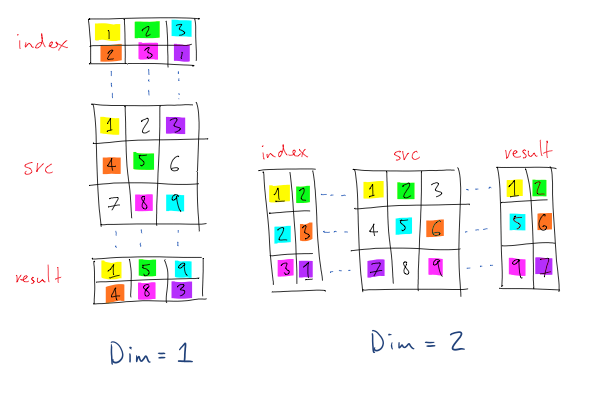

*Image source: [StackOverflow](https://stackoverflow.com/questions/50999977/what-does-the-gather-function-do-in-pytorch-in-layman-terms)*

In [ ]:
random_tensor = torch.randn(3, 4)
print('Initial Tensor:\n', random_tensor)
index = torch.Tensor([[0, 2, 0, 2], [2, 0, 1, 1]]).long()

gathered = torch.gather(input=random_tensor, dim=0, index=index)
print('Gathered Tensor (along dim 0):\n', gathered)

Initial Tensor:
 tensor([[-1.2451, -0.0288, -0.8601,  1.2799],
        [ 0.1995, -0.6920,  0.3259,  0.9575],
        [ 0.6273, -0.5571, -0.3997, -0.3072]])
Gathered Tensor (along dim 0):
 tensor([[-1.2451, -0.5571, -0.8601, -0.3072],
        [ 0.6273, -0.0288,  0.3259,  0.9575]])


### Argmax


You can get the index of the maximum element in a Tensor using `torch.argmax()`.

In [ ]:
x = torch.randn(5, 5)
print('Tensor:\n', x)

# alternatively, you can call x.argmax()
argmax_idx = torch.argmax(x)

# to get the maximum element (without using torch.max),
# we flatten the tensor first and access the location
# indicated by argmax_idx
max_element = x.reshape(-1)[argmax_idx]
print(f'argmax index: {argmax_idx}, max element: {max_element:0.4f}')

Tensor:
 tensor([[ 0.4402,  1.4038, -1.7495, -0.2645,  0.7070],
        [-1.0629,  0.7450,  1.0036,  1.9311, -0.1482],
        [-0.7125, -1.3520, -1.0285,  0.2289,  1.1106],
        [-0.1590,  0.5039, -0.6500,  1.3558, -0.9954],
        [ 0.3966,  0.6789,  0.0636,  0.2365, -1.4070]])
argmax index: 8, max element: 1.9311


You can also get the indices of the maximum elements over any dimension (axis) in the Tensor by specifying the `dim` parameter in `torch.argmax(dim=...)`.

In [ ]:
x = torch.randn(3, 5)
print('Tensor:\n', x)

argmax_cols = torch.argmax(x, dim=0)
print(f'Indices of maximal elements of each column: {argmax_cols}')

argmax_rows = torch.argmax(x, dim=1)
print(f'Indices of maximal elements of each row: {argmax_rows}')

Tensor:
 tensor([[-0.9856,  0.4075,  0.4813,  1.0511, -1.4420],
        [-1.8711,  0.8182,  0.3600, -0.7211,  1.2314],
        [-1.1858,  1.0514, -0.7601, -0.4890,  1.7719]])
Indices of maximal elements of each column: tensor([0, 2, 0, 0, 2])
Indices of maximal elements of each row: tensor([3, 4, 4])


To illustrate a bit how `torch.gather` works, we write a custom `my_max` function that uses ``torch.argmax()`` and ``torch.gather()`` to get the maximum values from a Tensor over a given dimension.

In [ ]:
def my_max(x: torch.Tensor, dim: int=0) -> torch.Tensor:
    """
    Maximum elements of x over dimension dim,
    using torch.argmax and torch.gather.
    """
    argmax_indices = torch.argmax(x, dim=dim)

    assert len(argmax_indices.size()) + 1 == len(x.size()), \
      "argmax_indices should have 1 dimension less than x"

    argmax_indices = argmax_indices.unsqueeze(dim)

    max_values = torch.gather(x, dim, argmax_indices)

    return max_values

Enter your own tensor shape, argmax dimension and run the blocks:

In [ ]:
tensor_shape = (5,3) #@param
dim = 0 #@param

In [ ]:
x = torch.rand(tensor_shape)
max_values = my_max(x, dim)
print(f"x: \n{x} shape: {x.shape}")
print(f"maximum values of each column (computer over all rows - dimension {dim}): \n{max_values} shape: {max_values.shape}")

# check that maximum values returned by my_max() are the
# same as the ones returned by torch.max()
assert torch.all(torch.eq(max_values,
    torch.max(x, dim=dim, keepdim=True)[0])), "wrong max"

x: 
tensor([[0.9642, 0.7787, 0.7933],
        [0.7981, 0.2766, 0.8731],
        [0.7500, 0.2491, 0.0694],
        [0.3602, 0.8582, 0.2681],
        [0.7885, 0.0441, 0.4149]]) shape: torch.Size([5, 3])
maximum values of each column (computer over all rows - dimension 0): 
tensor([[0.9642, 0.8582, 0.8731]]) shape: torch.Size([1, 3])


## Part II. A regression problem using neural networks
---

In [ ]:
from collections import defaultdict

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
import torch.nn as nn
import torch.optim as O
import torch.nn.functional as F
from torch.utils.data.dataset import TensorDataset

In [ ]:
!pip install git+https://github.com/floringogianu/utc_mdp

  Cloning https://github.com/floringogianu/utc_mdp to /tmp/pip-req-build-lhq9tlrj
  Running command git clone --filter=blob:none --quiet https://github.com/floringogianu/utc_mdp /tmp/pip-req-build-lhq9tlrj
  Resolved https://github.com/floringogianu/utc_mdp to commit d280562349a0e37cbae4bd566ff0195205dc7b8c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for utc_mdp: filename=utc_mdp-0.1.2-py3-none-any.whl size=5382 sha256=47b299db4d4b057400919fbc9aacbe80ed3d327d335d44492dc559cf86513b3d
  Stored in directory: /tmp/pip-ephem-wheel-cache-wyvq1dse/wheels/56/47/4c/1c3199b61e3a6113fed1081141468f4c35adf36deefed10514
Successfully built utc_mdp


In [ ]:
from utc_mdp import MDP, Sim

In [ ]:
SIMPLE_MAZE = """
G:2.0
x:-0.05
.: 0.0
---
xxxxxxxxxxxxxxxxx
x               x
x          xxx  x
x            x  x
x            x  x
x  xxx          x
x   Gx          x
x    x          x
x          xxx  x
x           Gx  x
x            x  x
x       s       x
xxxxxxxxxxxxxxxxx
"""

The API of the `MDP` and `Sim` objects remains the same as in the previous labs.

In [ ]:
sim = Sim(MDP(SIMPLE_MAZE))
sim.reset()

(142, False)

In [ ]:
def get_V(mdp, γ, ε_iter=1e-1):
    Qs = [torch.zeros(mdp.nXU)]
    while True:
        Q = Qs[len(Qs) - 1].clone()
        for x in mdp.X:
            for u in mdp.U:
                Q[x, u] = mdp.ρ(x, u) + γ * Q[mdp.f(x, u)].max()
        Qs.append(Q)
        if (Qs[-2] - Q).abs().max() <= ε_iter:
            break
    return Qs[-1].max(1).values

(<Figure size 640x480 with 2 Axes>, <Axes: >)

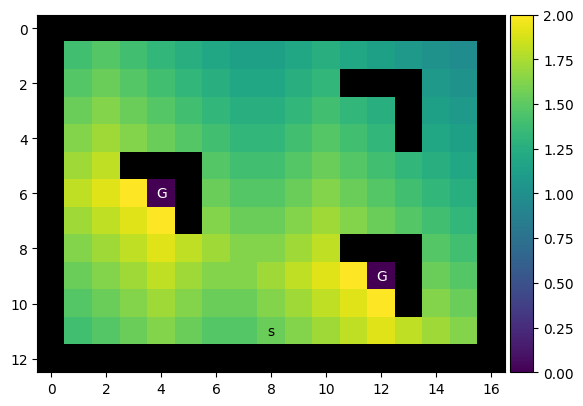

In [ ]:
V = get_V(sim.mdp, 0.95)
MDP.plot_values(sim.mdp, V)

### From states to observations

In deep reinforcement learning we often make the assumption that we don't have access to the underlying state $x$ of the MDP but to an observation $o$, produced by the environment, which is a function of the state $o = \phi(x)$.

The `Sim` object allows us to create simulations with various functions $\phi$.

In [ ]:
# a partial observation of 3 by 3 cells, centered around the agent
sim = Sim(MDP(SIMPLE_MAZE), "partial_observation")
sim.reset()[0]

array([[0., 0., 0.],
       [0., 0., 0.],
       [1., 1., 1.]], dtype=float32)

In [ ]:
# a representation in which each state is encoded by the cartesian coordinates on a grid
sim = Sim(MDP(SIMPLE_MAZE), "coords")
sim.reset()[0]

(11, 8)

### Sample observations using a random policy

Obtain a dataset of samples $o$ and targets $V^*(x)$, where the observation $o$ is a partial representation of the state: $o = \phi(x)$.

The goal is to use these samples to learn $V^*(x)$ from observations $o$.

In [ ]:
#@title
def sample_env(sim, policy, N=2**13, censor=None):
    """ Uses a given policy to sample the environment.
        Returns the states and their groundtruth values.
    """
    samples = []
    V = get_V(sim.mdp, 0.95)

    if censor is not None:
        ybounds = list(range(*censor[0]))
        xbounds = list(range(*censor[1]))
        print(f"Stările din intervalele y={censor[0]}, x={censor[1]} nu sunt eșantionate.")

    done = True
    while True:
        if done:
            obs, done = sim.reset()

        y,x = sim.mdp._x2yx[sim._crt_state]
        if censor is not None and y in ybounds and x in xbounds:
            pass
        else:
            samples.append((
                torch.tensor(obs).flatten().float(),
                V[sim._crt_state].unsqueeze(0),
                torch.tensor(sim._crt_state)
            ))

        action = policy.sample().item()
        obs, _, done = sim.step(action)

        if len(samples) == N:
            break
    return TensorDataset(*[torch.stack(t) for t in zip(*samples)])

In [ ]:
def sampler(dset, batch_size=32):
    """ A generator that returns random batches (chunks) from a dataset. """
    idxs = torch.randperm(len(dset))
    chunks = torch.split(idxs, batch_size)
    for chunk in chunks:
        batch = [dset[i] for i in chunk]
        yield [torch.stack(t) for t in zip(*batch)]


def eval_model(mdp: MDP, model: nn.Module):
    observations = torch.stack([torch.tensor(o).flatten() for o in sim.observations()]).float()
    return model(observations).detach().flatten()

### Train a linear function approximator with Stochastic Gradient Descent

In [ ]:
sim = Sim(MDP(SIMPLE_MAZE), "partial_observation")
policy = torch.distributions.Categorical(torch.ones(sim.mdp.nU))
dset = sample_env(sim, policy)

In [ ]:
dset[0]

(tensor([0., 0., 0., 0., 0., 0., 1., 1., 1.]), tensor([1.5476]), tensor(142))

### Task 2 [3pts]

Fill the missing code in the cells below:
1. instantiate a linear model using `nn.Linear` and an [optimization](https://pytorch.org/docs/stable/optim.html) algorithm. Try several learning rates.
2. fill in the rest of the [training loop](https://pytorch.org/docs/stable/optim.html#taking-an-optimization-step).

In [ ]:
input_dim = dset[0][0].nelement()

model = nn.Linear(input_dim,1,True)
optim = O.SGD(model.parameters(),lr=0.01,momentum=0.5)
#optim = O.Adam(model.parameters(),lr=0.01,betas=(0.65, 0.9), eps=1e-8,weight_decay=0.0015,amsgrad=False)

In [ ]:
def train(dset, model, optim, epochs=10):
    mse = nn.MSELoss()
    for epoch in range(epochs):
        losses = []
        for obs, target, _ in sampler(dset):

            # observations size: (32, feature_size)
            # target size: (32, 1)
            # state size: (32, 2)

            # compute predictions using the model and the observations
            y = model(obs)
            # compute the loss of the model using mean squared error
            loss = mse(y,target)

            optim.zero_grad()
            # compute the gradient of the loss wrt the weights
            loss.backward()
            # perform an optimization step
            optim.step()

            losses.append(loss.detach().item())
        if epoch % 2 == 0:
            print("[{:02d}]  avg. loss={:6.3f}".format(
                epoch, torch.tensor(losses).mean())
            )

In [ ]:
train(dset, model, optim, epochs=30)

[00]  avg. loss= 0.215
[02]  avg. loss= 0.039
[04]  avg. loss= 0.038
[06]  avg. loss= 0.038
[08]  avg. loss= 0.038
[10]  avg. loss= 0.038
[12]  avg. loss= 0.038
[14]  avg. loss= 0.038
[16]  avg. loss= 0.038
[18]  avg. loss= 0.038
[20]  avg. loss= 0.038
[22]  avg. loss= 0.038
[24]  avg. loss= 0.038
[26]  avg. loss= 0.038
[28]  avg. loss= 0.038


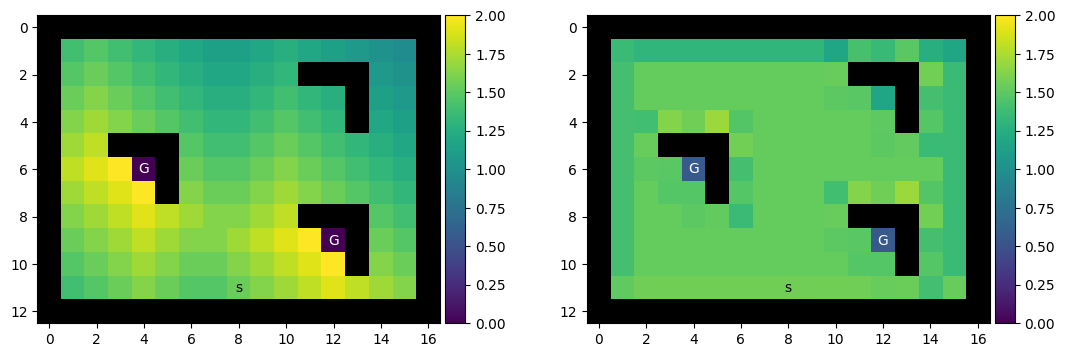

In [ ]:
V_star = get_V(sim.mdp, 0.95)
V_pred = eval_model(sim.mdp, model)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(13,4))
MDP.plot_values(sim.mdp, V_star, ax=ax0)
MDP.plot_values(sim.mdp, V_pred, ax=ax1, vmin=0, vmax=2.0)

### Task 3a [2 pts]

Instead of a linear model we will now train a neural network with three layers. Define the newtowork using `nn.Sequential` and multiple linear and activation layers.

You can use whatever activation functions you want.

In [ ]:
input_dim = dset[0][0].nelement()

model = nn.Sequential(
    nn.Linear(input_dim,10,True),
    nn.LeakyReLU(0.03),
    nn.Linear(10,3,True),
    nn.LeakyReLU(0.03),
    nn.Linear(3,1)
)

#optim = O.SGD(model.parameters(),lr=0.01,momentum=0.8)
optim = O.Adam(model.parameters(),lr=0.002,betas=(0.87, 0.95), eps=1e-8,weight_decay=0.0015,amsgrad=False)

train(dset, model, optim, epochs=30)

[00]  avg. loss= 0.570
[02]  avg. loss= 0.029
[04]  avg. loss= 0.025
[06]  avg. loss= 0.025
[08]  avg. loss= 0.025
[10]  avg. loss= 0.025
[12]  avg. loss= 0.024
[14]  avg. loss= 0.024
[16]  avg. loss= 0.024
[18]  avg. loss= 0.024
[20]  avg. loss= 0.024
[22]  avg. loss= 0.024
[24]  avg. loss= 0.024
[26]  avg. loss= 0.024
[28]  avg. loss= 0.024


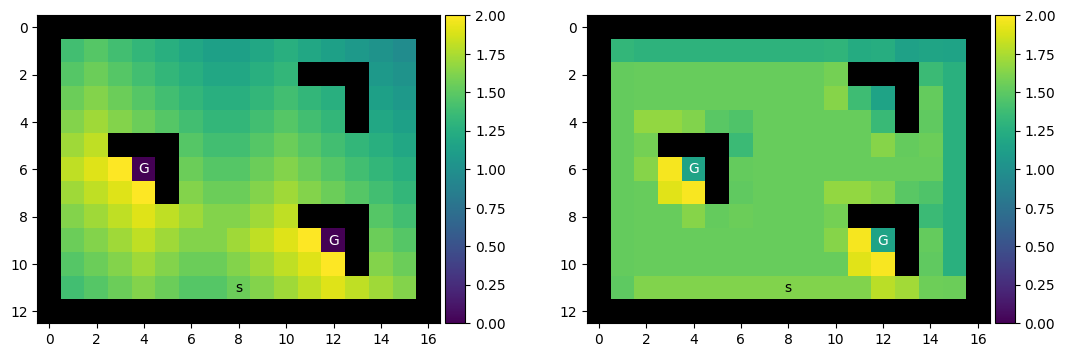

In [ ]:
V_star = get_V(sim.mdp, 0.95)
V_pred = eval_model(sim.mdp, model)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(13,4))
MDP.plot_values(sim.mdp, V_star, ax=ax0)
MDP.plot_values(sim.mdp, V_pred, ax=ax1, vmin=0, vmax=2.0)

### Task 3b [1 pt]

What do you observe? Which model produces more accurate predictions?

**Your answer:**

The model that produces more accurate predictions is the one with more layers and nonlinear activation functions.

This happens because a simple linear layer assumes that the dependece between the input (partial observations) and output (V*) is linear. In reality, this is not the case, as complex patterns can exist beneath the feature space and the corresponding output, petterns which can be observed by, at least, using a nonlinear activation function, if not, many linear layers with nonlinear activation functions.

Also, because the features in the areas with no obstacles and goals are characterized by zeros, the prediction remains the same for both models (like a flat surface). The main difference during the prediction step is for the areas where we have walls and goals.

The model tries to generalise the place where a goal should be, as it can be seen in the top right corner, where, despite the fact that we don't have a goal, the area around the wall resembles a bit the areas with walls around goals.

### Do neural networks generalize?

We will train the same model again, but on a dataset from which we exclude the observations around the second final state `G`, the one from the right.

The goal is to illustrate wether the model is able to accurately evaluate the states it wasn't trained on.

In [ ]:
sim = Sim(MDP(SIMPLE_MAZE), "partial_observation")
policy = torch.distributions.Categorical(torch.ones(sim.mdp.nU))
dset = sample_env(sim, policy, censor=((6,13), (9,16)))

Stările din intervalele y=(6, 13), x=(9, 16) nu sunt eșantionate.


In [ ]:
print("Excluded states: ")
sim.mdp.world[6:13, 9:16]

Excluded states: 


array([[' ', ' ', ' ', ' ', ' ', ' ', ' '],
       [' ', ' ', ' ', ' ', ' ', ' ', ' '],
       [' ', ' ', 'x', 'x', 'x', ' ', ' '],
       [' ', ' ', ' ', 'G', 'x', ' ', ' '],
       [' ', ' ', ' ', ' ', 'x', ' ', ' '],
       [' ', ' ', ' ', ' ', ' ', ' ', ' '],
       ['x', 'x', 'x', 'x', 'x', 'x', 'x']], dtype='<U1')

In [ ]:
# reinițializăm modelul de mai sus
for module in model.modules():
    if isinstance(module, nn.Linear):
        module.reset_parameters()

#optim = O.SGD(model.parameters(),lr=0.01,momentum=0.8)
optim = O.Adam(model.parameters(),lr=0.002,betas=(0.87, 0.95), eps=1e-8,weight_decay=0.0015,amsgrad=False)
train(dset, model, optim, epochs=30)

[00]  avg. loss= 0.357
[02]  avg. loss= 0.027
[04]  avg. loss= 0.024
[06]  avg. loss= 0.023
[08]  avg. loss= 0.022
[10]  avg. loss= 0.022
[12]  avg. loss= 0.022
[14]  avg. loss= 0.022
[16]  avg. loss= 0.022
[18]  avg. loss= 0.021
[20]  avg. loss= 0.021
[22]  avg. loss= 0.021
[24]  avg. loss= 0.021
[26]  avg. loss= 0.021
[28]  avg. loss= 0.021


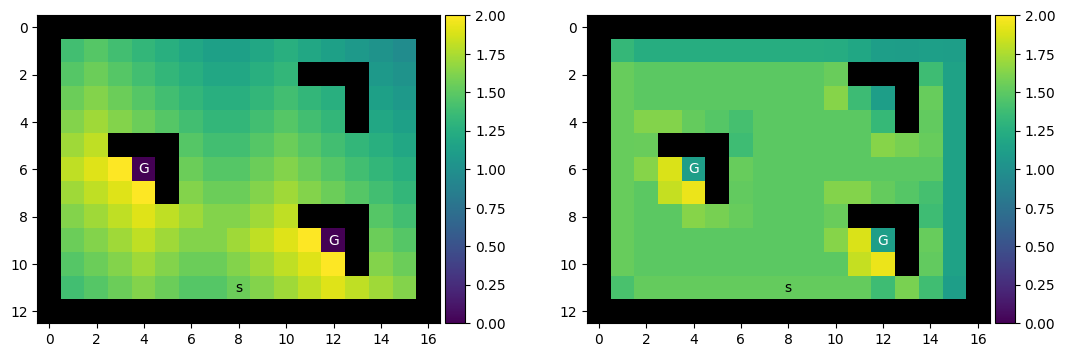

In [ ]:
V_star = get_V(sim.mdp, 0.95)
V_pred = eval_model(sim.mdp, model)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(13,4))
MDP.plot_values(sim.mdp, V_star, ax=ax0)
MDP.plot_values(sim.mdp, V_pred, ax=ax1, vmin=0, vmax=2.0)

### Learning in the fully observabale case

In [ ]:
sim = Sim(MDP(SIMPLE_MAZE), "coords")
policy = torch.distributions.Categorical(torch.ones(sim.mdp.nU))
dset = sample_env(sim, policy)

In [ ]:
input_dim = dset[0][0].nelement()

model = nn.Sequential(
    nn.Linear(input_dim, 32),
    nn.ReLU(),
    nn.Linear(32, 32),
    nn.ReLU(),
    nn.Linear(32, 1))

optim = O.Adam(model.parameters(), lr=0.01)

train(dset, model, optim, epochs=30)

[00]  avg. loss= 0.043
[02]  avg. loss= 0.005
[04]  avg. loss= 0.002
[06]  avg. loss= 0.001
[08]  avg. loss= 0.002
[10]  avg. loss= 0.001
[12]  avg. loss= 0.001
[14]  avg. loss= 0.001
[16]  avg. loss= 0.001
[18]  avg. loss= 0.000
[20]  avg. loss= 0.000
[22]  avg. loss= 0.001
[24]  avg. loss= 0.000
[26]  avg. loss= 0.000
[28]  avg. loss= 0.000


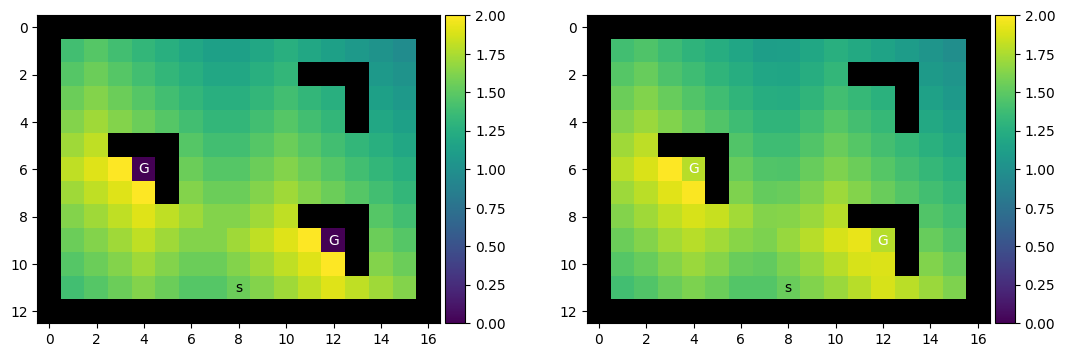

In [ ]:
V_star = get_V(sim.mdp, 0.95)
V_pred = eval_model(sim.mdp, model)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(13,4))
MDP.plot_values(sim.mdp, V_star, ax=ax0)
MDP.plot_values(sim.mdp, V_pred, ax=ax1, vmin=0, vmax=2.0)

### Task 4 [1 pt]

How do you explain the better approximation performed by the model that is trained on observations that contain the coordinates of the agent?

**Your answer:**

In the first case, we used a feature vector that describes the surroundings of the agent. This means we aimed to generalize the V-function based on the type of environment the agent is in, rather than its exact position. By doing so, the model attempts to infer the value function for states with similar surroundings.

In contrast, in the second case, the feature vectors are directly tied to the exact position of the agent. This creates a one-to-one correspondence between specific locations on the grid and their respective V-function values. As a result, the model learns a specific value function for each position, rather than generalizing across similar surroundings.

### Task 5 [1pt]

Define a new MDP and train a neural network on data sampled from it.

Try to think of interesting structures that would stress the generalization capabilites of the neural network.

**For this task I tried to improve the training proccess by reducing the batch size to 8 in the training function and also by increasing the number of samples in the dataset to $2^{15}$**

In [ ]:
def train(dset, model, optim, epochs=10):
    mse = nn.MSELoss()
    for epoch in range(epochs):
        losses = []
        for obs, target, _ in sampler(dset,batch_size=8):

            # observations size: (32, feature_size)
            # target size: (32, 1)
            # state size: (32, 2)

            # compute predictions using the model and the observations
            y = model(obs)
            # compute the loss of the model using mean squared error
            loss = mse(y,target)

            optim.zero_grad()
            # compute the gradient of the loss wrt the weights
            loss.backward()
            # perform an optimization step
            optim.step()

            losses.append(loss.detach().item())
        if epoch % 2 == 0:
            print("[{:02d}]  avg. loss={:6.3f}".format(
                epoch, torch.tensor(losses).mean())
            )

In [ ]:
GRIDNAV = """
G:2.0
A:1.0
B:1.0
x:-0.05
.:0.0
---
xxxxxxxxxxxxxxxxxxxxxxxxxxxx
x       G           x      x
x   xxxxxxxxxxxx    x   G  x
x   x          x    x      x
x   x   xxx    x         xxx
x   x   x x    x   xxxxxxx x
x   x   x x        x     x x
x   x   x xxxxx    x xxx x x
x   x   x          x x x x x
x   x   x   xxxxxx x x x x x
x   x   x         Ax x x x x
x   x   xxxxxxx      x x x x
x       x            x   x x
x   xxxxx      s         x x
x        xxxxxxxxxxxxxx  xxx
x   A    x       G         x
x   xxxxxx   xxx           x
x        x   x   xxxxxxxxxxx
x    xxx x   x         B   x
xxxxxxxxxxxxxxxxxxxxxxxxxxxx
"""

**Training a simpler NN with partial observation as features**

In [ ]:
sim = Sim(MDP(GRIDNAV), "partial_observation")
policy = torch.distributions.Categorical(torch.ones(sim.mdp.nU))
dset = sample_env(sim, policy,2**15)

In [ ]:
input_dim = dset[0][0].nelement()

model = nn.Sequential(
    nn.Linear(input_dim,10,True),
    nn.LeakyReLU(0.03),
    nn.Linear(10,3,True),
    nn.LeakyReLU(0.03),
    nn.Linear(3,1)
)

#optim = O.SGD(model.parameters(),lr=0.01,momentum=0.8)
optim = O.Adam(model.parameters(),lr=0.001,betas=(0.87, 0.95), eps=1e-8,weight_decay=0.0015,amsgrad=False)

train(dset, model, optim, epochs=70)

[00]  avg. loss= 0.099
[02]  avg. loss= 0.053
[04]  avg. loss= 0.051
[06]  avg. loss= 0.050
[08]  avg. loss= 0.050
[10]  avg. loss= 0.050
[12]  avg. loss= 0.050
[14]  avg. loss= 0.050
[16]  avg. loss= 0.050
[18]  avg. loss= 0.050
[20]  avg. loss= 0.050
[22]  avg. loss= 0.050
[24]  avg. loss= 0.050
[26]  avg. loss= 0.050
[28]  avg. loss= 0.050
[30]  avg. loss= 0.050
[32]  avg. loss= 0.050
[34]  avg. loss= 0.050
[36]  avg. loss= 0.050
[38]  avg. loss= 0.050
[40]  avg. loss= 0.050
[42]  avg. loss= 0.050
[44]  avg. loss= 0.049
[46]  avg. loss= 0.049
[48]  avg. loss= 0.049
[50]  avg. loss= 0.049
[52]  avg. loss= 0.049
[54]  avg. loss= 0.049
[56]  avg. loss= 0.049
[58]  avg. loss= 0.049
[60]  avg. loss= 0.049
[62]  avg. loss= 0.049
[64]  avg. loss= 0.049
[66]  avg. loss= 0.049
[68]  avg. loss= 0.049


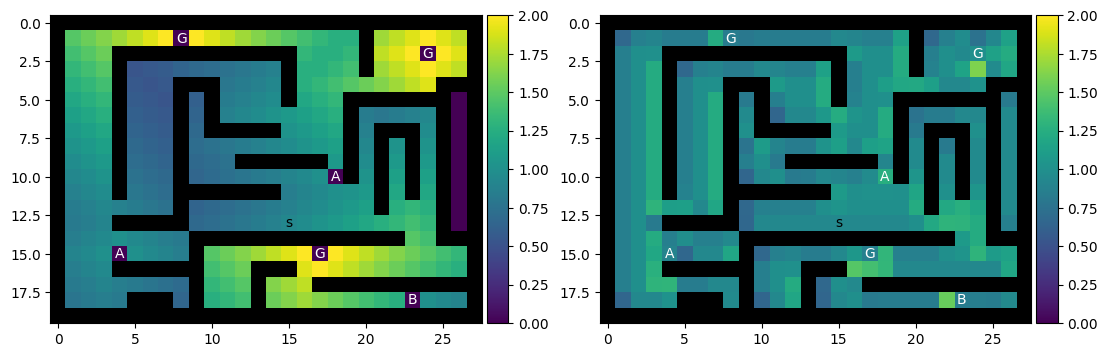

In [ ]:
V_star = get_V(sim.mdp, 0.95)
V_pred = eval_model(sim.mdp, model)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(13,4))
MDP.plot_values(sim.mdp, V_star, ax=ax0)
MDP.plot_values(sim.mdp, V_pred, ax=ax1, vmin=0, vmax=2.0)

**Training a simpler NN with coordinates as features**

In [ ]:
sim = Sim(MDP(GRIDNAV), "coords")
policy = torch.distributions.Categorical(torch.ones(sim.mdp.nU))
dset = sample_env(sim, policy,2**15)

In [ ]:
input_dim = dset[0][0].nelement()

model = nn.Sequential(
    nn.Linear(input_dim,10,True),
    nn.LeakyReLU(0.03),
    nn.Linear(10,3,True),
    nn.LeakyReLU(0.03),
    nn.Linear(3,1)
)

#optim = O.SGD(model.parameters(),lr=0.01,momentum=0.8)
optim = O.Adam(model.parameters(),lr=0.001,betas=(0.87, 0.95), eps=1e-8,weight_decay=0.0015,amsgrad=False)

train(dset, model, optim, epochs=70)

[00]  avg. loss= 0.029
[02]  avg. loss= 0.023
[04]  avg. loss= 0.023
[06]  avg. loss= 0.023
[08]  avg. loss= 0.022
[10]  avg. loss= 0.022
[12]  avg. loss= 0.022
[14]  avg. loss= 0.022
[16]  avg. loss= 0.022
[18]  avg. loss= 0.022
[20]  avg. loss= 0.022
[22]  avg. loss= 0.022
[24]  avg. loss= 0.016
[26]  avg. loss= 0.015
[28]  avg. loss= 0.015
[30]  avg. loss= 0.015
[32]  avg. loss= 0.015
[34]  avg. loss= 0.015
[36]  avg. loss= 0.015
[38]  avg. loss= 0.015
[40]  avg. loss= 0.015
[42]  avg. loss= 0.015
[44]  avg. loss= 0.015
[46]  avg. loss= 0.015
[48]  avg. loss= 0.015
[50]  avg. loss= 0.015
[52]  avg. loss= 0.015
[54]  avg. loss= 0.015
[56]  avg. loss= 0.015
[58]  avg. loss= 0.015
[60]  avg. loss= 0.015
[62]  avg. loss= 0.015
[64]  avg. loss= 0.015
[66]  avg. loss= 0.015
[68]  avg. loss= 0.015


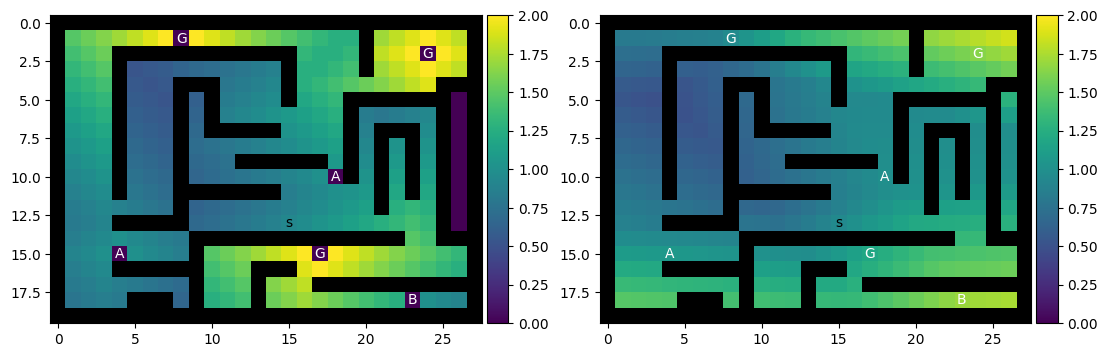

In [ ]:
V_star = get_V(sim.mdp, 0.95)
V_pred = eval_model(sim.mdp, model)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(13,4))
MDP.plot_values(sim.mdp, V_star, ax=ax0)
MDP.plot_values(sim.mdp, V_pred, ax=ax1, vmin=0, vmax=2.0)

**Training a much complex NN with partial observations**

In [ ]:
sim = Sim(MDP(GRIDNAV), "partial_observation")
policy = torch.distributions.Categorical(torch.ones(sim.mdp.nU))
dset = sample_env(sim, policy,2**15)

In [ ]:
input_dim = dset[0][0].nelement()

model = nn.Sequential(
    nn.Linear(input_dim,10,True),
    nn.LeakyReLU(0.03),
    nn.Linear(10,5,True),
    nn.LeakyReLU(0.03),
    nn.Linear(5,8,True),
    nn.LeakyReLU(0.01),
    nn.Linear(8,10,True),
    nn.LeakyReLU(0.01),
    nn.Linear(10,10,True),
    nn.LeakyReLU(0.01),
    nn.Linear(10,1,True)
)

optim = O.SGD(model.parameters(),lr=0.01,momentum=0.8)
#optim = O.Adam(model.parameters(),lr=0.001,betas=(0.87, 0.95), eps=1e-8,weight_decay=0.0015,amsgrad=False)

train(dset, model, optim, epochs=30)

[00]  avg. loss= 0.057
[02]  avg. loss= 0.049
[04]  avg. loss= 0.045
[06]  avg. loss= 0.044
[08]  avg. loss= 0.043
[10]  avg. loss= 0.041
[12]  avg. loss= 0.039
[14]  avg. loss= 0.038
[16]  avg. loss= 0.037
[18]  avg. loss= 0.037
[20]  avg. loss= 0.037
[22]  avg. loss= 0.037
[24]  avg. loss= 0.036
[26]  avg. loss= 0.036
[28]  avg. loss= 0.036


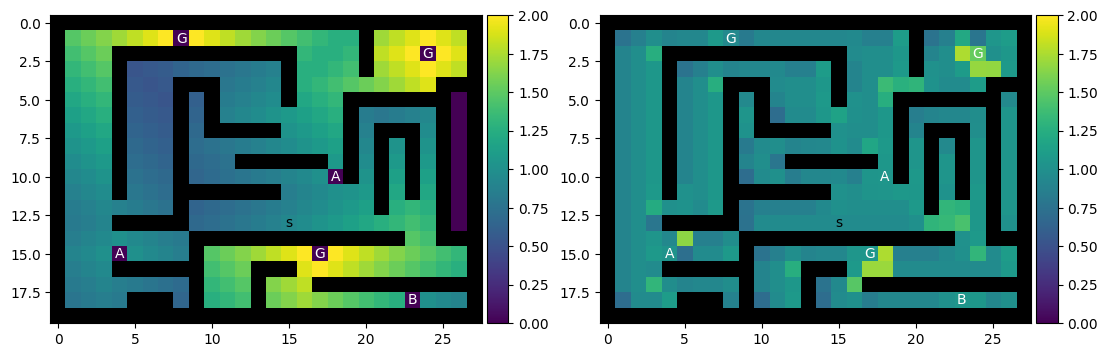

In [ ]:
V_star = get_V(sim.mdp, 0.95)
V_pred = eval_model(sim.mdp, model)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(13,4))
MDP.plot_values(sim.mdp, V_star, ax=ax0)
MDP.plot_values(sim.mdp, V_pred, ax=ax1, vmin=0, vmax=2.0)

**Trainig a much complex NN with coordinates as features**

In [ ]:
sim = Sim(MDP(GRIDNAV), "coords")
policy = torch.distributions.Categorical(torch.ones(sim.mdp.nU))
dset = sample_env(sim, policy,2**15)

In [ ]:
input_dim = dset[0][0].nelement()

model = nn.Sequential(
    nn.Linear(input_dim,10,True),
    nn.LeakyReLU(0.03),
    nn.Linear(10,5,True),
    nn.LeakyReLU(0.03),
    nn.Linear(5,8,True),
    nn.LeakyReLU(0.01),
    nn.Linear(8,10,True),
    nn.LeakyReLU(0.01),
    nn.Linear(10,10,True),
    nn.LeakyReLU(0.01),
    nn.Linear(10,1,True)
)

#optim = O.SGD(model.parameters(),lr=0.01,momentum=0.8)
optim = O.Adam(model.parameters(),lr=0.001,betas=(0.9, 0.99), eps=1e-8,weight_decay=0.0015,amsgrad=False)

train(dset, model, optim, epochs=30)

[00]  avg. loss= 0.032
[02]  avg. loss= 0.017
[04]  avg. loss= 0.013
[06]  avg. loss= 0.013
[08]  avg. loss= 0.012
[10]  avg. loss= 0.012
[12]  avg. loss= 0.011
[14]  avg. loss= 0.011
[16]  avg. loss= 0.010
[18]  avg. loss= 0.010
[20]  avg. loss= 0.010
[22]  avg. loss= 0.009
[24]  avg. loss= 0.009
[26]  avg. loss= 0.009
[28]  avg. loss= 0.009


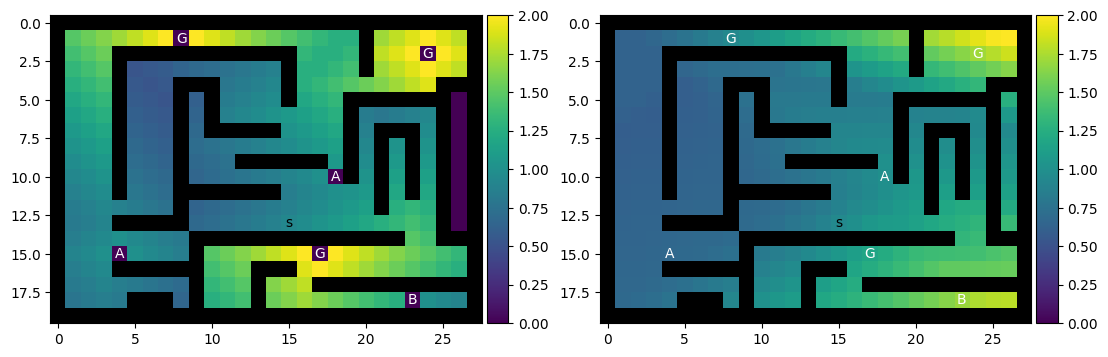

In [ ]:
V_star = get_V(sim.mdp, 0.95)
V_pred = eval_model(sim.mdp, model)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(13,4))
MDP.plot_values(sim.mdp, V_star, ax=ax0)
MDP.plot_values(sim.mdp, V_pred, ax=ax1, vmin=0, vmax=2.0)